In [104]:
import os
import pandas as pd
import numpy as np

In [105]:
# url="https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv"

In [106]:
movies_data=pd.read_csv("movies.csv")

In [107]:
movies_data

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [108]:
movies_data.shape

(9999, 9)

In [109]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [110]:
movies_data.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


### Columns name

In [111]:
movies_data.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

### Null Values count

In [112]:
movies_data.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

### Selecting relevant data

In [113]:
data=movies_data.drop(["ONE-LINE"], axis=1)
data.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [114]:
data["GENRE"]=data.GENRE.str.replace("\n","")
data.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [115]:
data["STARS"]=data.STARS.str.replace("\n", "")
data.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN


In [116]:
data.GENRE.unique()

array(['Action, Horror, Thriller            ',
       'Animation, Action, Adventure            ',
       'Drama, Horror, Thriller            ',
       'Animation, Adventure, Comedy            ',
       'Action, Crime, Horror            ',
       'Action, Crime, Drama            ', 'Drama, Romance            ',
       'Crime, Drama, Mystery            ', 'Comedy            ',
       'Action, Adventure, Thriller            ',
       'Crime, Drama, Fantasy            ',
       'Drama, Horror, Mystery            ',
       'Comedy, Drama, Romance            ',
       'Crime, Drama, Thriller            ', 'Drama            ',
       'Comedy, Drama            ', 'Drama, Fantasy, Horror            ',
       'Comedy, Romance            ',
       'Action, Adventure, Drama            ', 'Crime, Drama            ',
       'Drama, History, Romance            ',
       'Horror, Mystery            ', 'Comedy, Crime            ',
       'Action, Drama, History            ',
       'Action, Adventure, 

In [117]:
data["GENRE"]=data.GENRE.str.rstrip(" ")
data.GENRE.unique()

array(['Action, Horror, Thriller', 'Animation, Action, Adventure',
       'Drama, Horror, Thriller', 'Animation, Adventure, Comedy',
       'Action, Crime, Horror', 'Action, Crime, Drama', 'Drama, Romance',
       'Crime, Drama, Mystery', 'Comedy', 'Action, Adventure, Thriller',
       'Crime, Drama, Fantasy', 'Drama, Horror, Mystery',
       'Comedy, Drama, Romance', 'Crime, Drama, Thriller', 'Drama',
       'Comedy, Drama', 'Drama, Fantasy, Horror', 'Comedy, Romance',
       'Action, Adventure, Drama', 'Crime, Drama',
       'Drama, History, Romance', 'Horror, Mystery', 'Comedy, Crime',
       'Action, Drama, History', 'Action, Adventure, Crime',
       'Action, Adventure, Fantasy', 'Action, Crime, Mystery',
       'Drama, Fantasy, Romance', 'Drama, Sci-Fi, Thriller',
       'Biography, Drama, History', 'Crime, Thriller',
       'Comedy, Crime, Drama', 'Drama, Mystery, Thriller',
       'Action, Adventure, Mystery', 'Action, Comedy',
       'Crime, Drama, Horror', 'Drama, Mystery, Sc

### Separating the different Genres

In [118]:
# data[["Genre1", "Genre2", "Genre3"]]=data["GENRE"].str.split(",", n=3, expand=True)
# data.head()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9999 non-null   object 
 1   YEAR     9355 non-null   object 
 2   GENRE    9919 non-null   object 
 3   RATING   8179 non-null   float64
 4   STARS    9999 non-null   object 
 5   VOTES    8179 non-null   object 
 6   RunTime  7041 non-null   float64
 7   Gross    460 non-null    object 
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


### Replacing ratings with mean value

In [121]:
data["RATING"].mean()

6.921176182907419

In [122]:
data["RATING"].describe()

count    8179.000000
mean        6.921176
std         1.220232
min         1.100000
25%         6.200000
50%         7.100000
75%         7.800000
max         9.900000
Name: RATING, dtype: float64

In [123]:
data["RATING"]=data.RATING.fillna(data["RATING"].mean)
data.isna().sum()

MOVIES        0
YEAR        644
GENRE        80
RATING        0
STARS         0
VOTES      1820
RunTime    2958
Gross      9539
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9999 non-null   object 
 1   YEAR     9355 non-null   object 
 2   GENRE    9919 non-null   object 
 3   RATING   9999 non-null   object 
 4   STARS    9999 non-null   object 
 5   VOTES    8179 non-null   object 
 6   RunTime  7041 non-null   float64
 7   Gross    460 non-null    object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


### Replacing the runtime with median value

In [22]:
data.RunTime.fillna(data["RunTime"].mean(), inplace=True)
data.isna().sum()

MOVIES        0
YEAR        644
GENRE        80
RATING        0
STARS         0
VOTES      1820
RunTime       0
Gross      9539
dtype: int64

### As of now, we drop the Genre1,2, and 3

In [23]:
# data.drop(["Genre1", "Genre2", "Genre3"], axis=1, inplace=True)
# data.isna().sum()

### changing the type of VOTES column, first removing its comma "," and then chamging it into int or a float

In [24]:
# data["VOTES"]=data["VOTES"].str.replace(",", "")
# data.head()

In [25]:
for i in range(len(data["VOTES"])):
#     print(data["VOTES"].iloc[i], type(data["VOTES"].iloc[i]))

#     replacing "," with ""

    if str(data["VOTES"].iloc[i])!=("nan" or "NAN" or "Nan"):
        try:
            data["VOTES"].iloc[i]=data["VOTES"].iloc[i].replace(",", "")
            print(data["VOTES"].iloc[i], type(data["VOTES"].iloc[i]))
        except:
            pass
    else:
        pass
    
#     changing str type to int or float
#     data["VOTES"].iloc[i]=float(data["VOTES"].iloc[i])
#     print(data["VOTES"].iloc[i], type(data["VOTES"].iloc[i]))
    


21062 <class 'str'>
17870 <class 'str'>
885805 <class 'str'>
414849 <class 'str'>
25858 <class 'str'>
5283 <class 'str'>
665387 <class 'str'>
34530 <class 'str'>
27279 <class 'str'>
17989 <class 'str'>
264222 <class 'str'>
50148 <class 'str'>
12172 <class 'str'>
286488 <class 'str'>
266258 <class 'str'>
1552311 <class 'str'>
70871 <class 'str'>
71544 <class 'str'>
885856 <class 'str'>
36634 <class 'str'>
880918 <class 'str'>
320264 <class 'str'>
393414 <class 'str'>
4681 <class 'str'>
459913 <class 'str'>
347857 <class 'str'>
404273 <class 'str'>
213522 <class 'str'>
27447 <class 'str'>
26926 <class 'str'>
248583 <class 'str'>
125619 <class 'str'>
34906 <class 'str'>
378030 <class 'str'>
73656 <class 'str'>
336484 <class 'str'>
171804 <class 'str'>
242582 <class 'str'>
374263 <class 'str'>
341858 <class 'str'>
90728 <class 'str'>
134991 <class 'str'>
94650 <class 'str'>
469407 <class 'str'>
206090 <class 'str'>
169517 <class 'str'>
37142 <class 'str'>
132378 <class 'str'>
341221 <class

C:\Users\Haseeb\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


5326 <class 'str'>
95660 <class 'str'>
64076 <class 'str'>
25983 <class 'str'>
17902 <class 'str'>
28438 <class 'str'>
8085 <class 'str'>
25578 <class 'str'>
35640 <class 'str'>
75985 <class 'str'>
10958 <class 'str'>
201472 <class 'str'>
2222 <class 'str'>
141657 <class 'str'>
175334 <class 'str'>
13458 <class 'str'>
32620 <class 'str'>
738 <class 'str'>
19559 <class 'str'>
228812 <class 'str'>
55979 <class 'str'>
22347 <class 'str'>
170681 <class 'str'>
77040 <class 'str'>
67180 <class 'str'>
41856 <class 'str'>
19062 <class 'str'>
84230 <class 'str'>
9016 <class 'str'>
102222 <class 'str'>
3549 <class 'str'>
110725 <class 'str'>
39553 <class 'str'>
25954 <class 'str'>
273061 <class 'str'>
84387 <class 'str'>
3933 <class 'str'>
102725 <class 'str'>
134759 <class 'str'>
359473 <class 'str'>
49116 <class 'str'>
38791 <class 'str'>
5778 <class 'str'>
3574 <class 'str'>
115059 <class 'str'>
161 <class 'str'>
12428 <class 'str'>
106580 <class 'str'>
24525 <class 'str'>
12624 <class 'str'>

3553 <class 'str'>
3944 <class 'str'>
45491 <class 'str'>
1440 <class 'str'>
338 <class 'str'>
11331 <class 'str'>
2383 <class 'str'>
3959 <class 'str'>
46327 <class 'str'>
1156 <class 'str'>
8546 <class 'str'>
11421 <class 'str'>
2134 <class 'str'>
3786 <class 'str'>
3512 <class 'str'>
1942 <class 'str'>
10048 <class 'str'>
37007 <class 'str'>
3836 <class 'str'>
200 <class 'str'>
25743 <class 'str'>
2072 <class 'str'>
2486 <class 'str'>
9291 <class 'str'>
214 <class 'str'>
20005 <class 'str'>
26365 <class 'str'>
768 <class 'str'>
1704 <class 'str'>
16358 <class 'str'>
17281 <class 'str'>
15158 <class 'str'>
17952 <class 'str'>
10173 <class 'str'>
900 <class 'str'>
13946 <class 'str'>
10647 <class 'str'>
7644 <class 'str'>
15269 <class 'str'>
21963 <class 'str'>
1357 <class 'str'>
3941 <class 'str'>
41510 <class 'str'>
12375 <class 'str'>
10004 <class 'str'>
36715 <class 'str'>
124409 <class 'str'>
566 <class 'str'>
1669 <class 'str'>
4197 <class 'str'>
58668 <class 'str'>
39 <class 's

1356 <class 'str'>
3110 <class 'str'>
1784 <class 'str'>
211 <class 'str'>
251 <class 'str'>
4632 <class 'str'>
22504 <class 'str'>
3743 <class 'str'>
973 <class 'str'>
4914 <class 'str'>
9475 <class 'str'>
750 <class 'str'>
6940 <class 'str'>
33496 <class 'str'>
3231 <class 'str'>
15625 <class 'str'>
340 <class 'str'>
1551 <class 'str'>
4246 <class 'str'>
2413 <class 'str'>
1496 <class 'str'>
7273 <class 'str'>
10169 <class 'str'>
19411 <class 'str'>
2646 <class 'str'>
3813 <class 'str'>
15091 <class 'str'>
994 <class 'str'>
8263 <class 'str'>
5433 <class 'str'>
6745 <class 'str'>
6303 <class 'str'>
4517 <class 'str'>
16620 <class 'str'>
23879 <class 'str'>
2776 <class 'str'>
7296 <class 'str'>
2908 <class 'str'>
2711 <class 'str'>
3166 <class 'str'>
6466 <class 'str'>
3022 <class 'str'>
1151 <class 'str'>
1393 <class 'str'>
1688 <class 'str'>
2200 <class 'str'>
152 <class 'str'>
2460 <class 'str'>
781 <class 'str'>
414 <class 'str'>
14912 <class 'str'>
1108 <class 'str'>
3713 <class 

2619 <class 'str'>
1289 <class 'str'>
822 <class 'str'>
4295 <class 'str'>
4468 <class 'str'>
1677 <class 'str'>
347 <class 'str'>
2062 <class 'str'>
2436 <class 'str'>
7515 <class 'str'>
3219 <class 'str'>
1979 <class 'str'>
1933 <class 'str'>
3096 <class 'str'>
4167 <class 'str'>
5405 <class 'str'>
1261 <class 'str'>
491 <class 'str'>
2377 <class 'str'>
5256 <class 'str'>
246 <class 'str'>
5411 <class 'str'>
2489 <class 'str'>
7196 <class 'str'>
1877 <class 'str'>
7695 <class 'str'>
1098 <class 'str'>
13904 <class 'str'>
2191 <class 'str'>
3293 <class 'str'>
1330 <class 'str'>
2365 <class 'str'>
1674 <class 'str'>
4161 <class 'str'>
8306 <class 'str'>
869 <class 'str'>
522 <class 'str'>
123 <class 'str'>
2536 <class 'str'>
1510 <class 'str'>
6774 <class 'str'>
5167 <class 'str'>
5185 <class 'str'>
826 <class 'str'>
332 <class 'str'>
982 <class 'str'>
1810 <class 'str'>
3985 <class 'str'>
5330 <class 'str'>
7848 <class 'str'>
3413 <class 'str'>
2884 <class 'str'>
9359 <class 'str'>
22

3389 <class 'str'>
3639 <class 'str'>
684 <class 'str'>
1144 <class 'str'>
8963 <class 'str'>
396 <class 'str'>
1697 <class 'str'>
11950 <class 'str'>
1211 <class 'str'>
2428 <class 'str'>
4406 <class 'str'>
1130 <class 'str'>
4733 <class 'str'>
1008 <class 'str'>
8169 <class 'str'>
385 <class 'str'>
692 <class 'str'>
407 <class 'str'>
9497 <class 'str'>
630 <class 'str'>
2124 <class 'str'>
537 <class 'str'>
5560 <class 'str'>
458 <class 'str'>
291 <class 'str'>
3154 <class 'str'>
3313 <class 'str'>
16246 <class 'str'>
2877 <class 'str'>
7937 <class 'str'>
4437 <class 'str'>
850 <class 'str'>
574 <class 'str'>
4717 <class 'str'>
607 <class 'str'>
1359 <class 'str'>
1780 <class 'str'>
1257 <class 'str'>
2702 <class 'str'>
5451 <class 'str'>
2442 <class 'str'>
894 <class 'str'>
627 <class 'str'>
3890 <class 'str'>
269 <class 'str'>
14 <class 'str'>
1434 <class 'str'>
1197 <class 'str'>
831 <class 'str'>
1790 <class 'str'>
585 <class 'str'>
1562 <class 'str'>
2758 <class 'str'>
5271 <clas

2395 <class 'str'>
2109 <class 'str'>
474 <class 'str'>
4397 <class 'str'>
1332 <class 'str'>
1823 <class 'str'>
853 <class 'str'>
2806 <class 'str'>
665 <class 'str'>
1448 <class 'str'>
5739 <class 'str'>
1274 <class 'str'>
81 <class 'str'>
4082 <class 'str'>
141 <class 'str'>
3017 <class 'str'>
766 <class 'str'>
77 <class 'str'>
2026 <class 'str'>
502 <class 'str'>
2447 <class 'str'>
518 <class 'str'>
4587 <class 'str'>
329 <class 'str'>
292 <class 'str'>
337 <class 'str'>
455 <class 'str'>
2312 <class 'str'>
2076 <class 'str'>
32708 <class 'str'>
3310 <class 'str'>
593 <class 'str'>
885 <class 'str'>
89 <class 'str'>
3054 <class 'str'>
421 <class 'str'>
2734 <class 'str'>
2253 <class 'str'>
2308 <class 'str'>
7067 <class 'str'>
459 <class 'str'>
334 <class 'str'>
6989 <class 'str'>
295 <class 'str'>
1829 <class 'str'>
1197 <class 'str'>
1169 <class 'str'>
510 <class 'str'>
245 <class 'str'>
1927 <class 'str'>
3806 <class 'str'>
524 <class 'str'>
2057 <class 'str'>
2220 <class 'str'>

46 <class 'str'>
76 <class 'str'>
232 <class 'str'>
84 <class 'str'>
903 <class 'str'>
367 <class 'str'>
1059 <class 'str'>
365 <class 'str'>
762 <class 'str'>
689 <class 'str'>
2904 <class 'str'>
317 <class 'str'>
44464 <class 'str'>
270 <class 'str'>
879 <class 'str'>
769 <class 'str'>
70 <class 'str'>
604 <class 'str'>
311 <class 'str'>
65 <class 'str'>
339 <class 'str'>
249 <class 'str'>
2797 <class 'str'>
659 <class 'str'>
676 <class 'str'>
681 <class 'str'>
2445 <class 'str'>
173 <class 'str'>
151 <class 'str'>
2408 <class 'str'>
535 <class 'str'>
1844 <class 'str'>
741 <class 'str'>
877 <class 'str'>
963 <class 'str'>
139 <class 'str'>
2347 <class 'str'>
511 <class 'str'>
1855 <class 'str'>
262 <class 'str'>
1332 <class 'str'>
1717 <class 'str'>
551 <class 'str'>
587 <class 'str'>
834 <class 'str'>
557 <class 'str'>
549 <class 'str'>
153 <class 'str'>
294 <class 'str'>
2608 <class 'str'>
7344 <class 'str'>
920 <class 'str'>
499 <class 'str'>
619 <class 'str'>
1542 <class 'str'>


974 <class 'str'>
5098 <class 'str'>
434 <class 'str'>
164 <class 'str'>
383 <class 'str'>
87 <class 'str'>
519 <class 'str'>
894 <class 'str'>
135 <class 'str'>
352 <class 'str'>
429 <class 'str'>
2695 <class 'str'>
1096 <class 'str'>
94 <class 'str'>
15 <class 'str'>
743 <class 'str'>
2047 <class 'str'>
536 <class 'str'>
571 <class 'str'>
150 <class 'str'>
1196 <class 'str'>
983 <class 'str'>
609 <class 'str'>
42 <class 'str'>
1234 <class 'str'>
1647 <class 'str'>
2141 <class 'str'>
493 <class 'str'>
74 <class 'str'>
395 <class 'str'>
394 <class 'str'>
1624 <class 'str'>
138 <class 'str'>
174 <class 'str'>
1212 <class 'str'>
506 <class 'str'>
165 <class 'str'>
329 <class 'str'>
89 <class 'str'>
80 <class 'str'>
643 <class 'str'>
125 <class 'str'>
76 <class 'str'>
2066 <class 'str'>
41 <class 'str'>
148 <class 'str'>
4555 <class 'str'>
21 <class 'str'>
696 <class 'str'>
168 <class 'str'>
413 <class 'str'>
702 <class 'str'>
267 <class 'str'>
1872 <class 'str'>
3875 <class 'str'>
2835 <

11 <class 'str'>
7 <class 'str'>
412 <class 'str'>
118 <class 'str'>
66 <class 'str'>
274 <class 'str'>
160 <class 'str'>
618 <class 'str'>
106 <class 'str'>
1442 <class 'str'>
87 <class 'str'>
298 <class 'str'>
756 <class 'str'>
1046 <class 'str'>
20 <class 'str'>
144 <class 'str'>
202 <class 'str'>
256 <class 'str'>
81 <class 'str'>
62 <class 'str'>
450 <class 'str'>
10 <class 'str'>
385 <class 'str'>
11 <class 'str'>
679 <class 'str'>
251 <class 'str'>
648 <class 'str'>
47 <class 'str'>
186 <class 'str'>
131 <class 'str'>
403 <class 'str'>
433 <class 'str'>
335 <class 'str'>
36 <class 'str'>
131 <class 'str'>
480 <class 'str'>
50 <class 'str'>
146 <class 'str'>
324 <class 'str'>
316 <class 'str'>
1119 <class 'str'>
220 <class 'str'>
159 <class 'str'>
405 <class 'str'>
578 <class 'str'>
172 <class 'str'>
394 <class 'str'>
33 <class 'str'>
640 <class 'str'>
75 <class 'str'>
100 <class 'str'>
14 <class 'str'>
806 <class 'str'>
82 <class 'str'>
1140 <class 'str'>
8 <class 'str'>
588 <cl

88 <class 'str'>
87 <class 'str'>
370 <class 'str'>
406 <class 'str'>
334 <class 'str'>
349 <class 'str'>
319 <class 'str'>
301 <class 'str'>
297 <class 'str'>
288 <class 'str'>
339 <class 'str'>
238 <class 'str'>
196 <class 'str'>
186 <class 'str'>
185 <class 'str'>
23 <class 'str'>
12 <class 'str'>
10 <class 'str'>
6 <class 'str'>
7 <class 'str'>
6 <class 'str'>
6 <class 'str'>
6 <class 'str'>
6 <class 'str'>
6 <class 'str'>
6 <class 'str'>
1794 <class 'str'>
145 <class 'str'>
126 <class 'str'>
315 <class 'str'>
204 <class 'str'>
31 <class 'str'>
360 <class 'str'>
270 <class 'str'>
282 <class 'str'>
220 <class 'str'>
248 <class 'str'>
197 <class 'str'>
190 <class 'str'>
190 <class 'str'>
171 <class 'str'>
151 <class 'str'>
2770 <class 'str'>
162 <class 'str'>
246 <class 'str'>
1948 <class 'str'>
1837 <class 'str'>
1850 <class 'str'>
1905 <class 'str'>
1715 <class 'str'>
1644 <class 'str'>
1776 <class 'str'>
375 <class 'str'>
166 <class 'str'>
95 <class 'str'>
1901 <class 'str'>
30 <c

85 <class 'str'>
1507 <class 'str'>
1694 <class 'str'>
283 <class 'str'>
35 <class 'str'>
33 <class 'str'>
32 <class 'str'>
31 <class 'str'>
35 <class 'str'>
1411 <class 'str'>
85 <class 'str'>
92 <class 'str'>
83 <class 'str'>
89 <class 'str'>
105 <class 'str'>
333 <class 'str'>
288 <class 'str'>
300 <class 'str'>
311 <class 'str'>
109 <class 'str'>
92 <class 'str'>
92 <class 'str'>
82 <class 'str'>
85 <class 'str'>
78 <class 'str'>
71 <class 'str'>
73 <class 'str'>
75 <class 'str'>
95 <class 'str'>
253 <class 'str'>
233 <class 'str'>
188 <class 'str'>
190 <class 'str'>
183 <class 'str'>
181 <class 'str'>
278 <class 'str'>
256 <class 'str'>
173 <class 'str'>
199 <class 'str'>
235 <class 'str'>
278 <class 'str'>
119 <class 'str'>
122 <class 'str'>
2880 <class 'str'>
40 <class 'str'>
34 <class 'str'>
32 <class 'str'>
32 <class 'str'>
35 <class 'str'>
33 <class 'str'>
29 <class 'str'>
31 <class 'str'>
29 <class 'str'>
19 <class 'str'>
19 <class 'str'>
18 <class 'str'>
17 <class 'str'>
20

124 <class 'str'>
57 <class 'str'>
396 <class 'str'>
380 <class 'str'>
367 <class 'str'>
689 <class 'str'>
630 <class 'str'>
618 <class 'str'>
565 <class 'str'>
248 <class 'str'>
241 <class 'str'>
261 <class 'str'>
232 <class 'str'>
249 <class 'str'>
234 <class 'str'>
255 <class 'str'>
42 <class 'str'>
131 <class 'str'>
1103 <class 'str'>
1060 <class 'str'>
1277 <class 'str'>
127 <class 'str'>
34 <class 'str'>
25 <class 'str'>
23 <class 'str'>
23 <class 'str'>
23 <class 'str'>
618 <class 'str'>
243 <class 'str'>
222 <class 'str'>
213 <class 'str'>
202 <class 'str'>
156 <class 'str'>
149 <class 'str'>
143 <class 'str'>
138 <class 'str'>
138 <class 'str'>
129 <class 'str'>
129 <class 'str'>
134 <class 'str'>
88 <class 'str'>
81 <class 'str'>
81 <class 'str'>
72 <class 'str'>
648 <class 'str'>
582 <class 'str'>
541 <class 'str'>
536 <class 'str'>
517 <class 'str'>
516 <class 'str'>
541 <class 'str'>
620 <class 'str'>
88 <class 'str'>
72 <class 'str'>
69 <class 'str'>
75 <class 'str'>
356 

In [26]:
data['VOTES']=pd.to_numeric(data['VOTES'])

In [27]:
data["VOTES"]

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9994         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: VOTES, Length: 9999, dtype: float64

In [28]:
data.isna().sum()

MOVIES        0
YEAR        644
GENRE        80
RATING        0
STARS         0
VOTES      1820
RunTime       0
Gross      9539
dtype: int64

### Replacing VOTES null values with mean

In [29]:
data["VOTES"].fillna(data["VOTES"].median, inplace=True)
data.isna().sum()

MOVIES        0
YEAR        644
GENRE        80
RATING        0
STARS         0
VOTES         0
RunTime       0
Gross      9539
dtype: int64

### Replacing Gross column nan values with "0"

In [30]:
data["Gross"].fillna("0", inplace=True)
data.isna().sum()

MOVIES       0
YEAR       644
GENRE       80
RATING       0
STARS        0
VOTES        0
RunTime      0
Gross        0
dtype: int64

### GENRE split and then counting unique GENRE

In [31]:
from itertools import combinations
from collections import Counter

In [32]:
count=Counter()

In [33]:
print(data[["GENRE"]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GENRE   9919 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB
None


In [34]:
for genre in data["GENRE"]:
#     print(genre)
    genre=str(genre) #object type data first needs to be changed to string data
    genre_split=genre.split(",")
    count.update(Counter(combinations(genre_split, 1)))

count

Counter({('Action',): 1296,
         (' Horror',): 394,
         (' Thriller',): 844,
         ('Animation',): 1723,
         (' Action',): 962,
         (' Adventure',): 1589,
         ('Drama',): 1712,
         (' Comedy',): 877,
         (' Crime',): 796,
         (' Drama',): 2613,
         (' Romance',): 814,
         ('Crime',): 770,
         (' Mystery',): 858,
         ('Comedy',): 1955,
         (' Fantasy',): 540,
         (' History',): 370,
         ('Horror',): 159,
         (' Sci-Fi',): 291,
         ('Biography',): 170,
         (' Family',): 404,
         ('Adventure',): 203,
         (' Biography',): 142,
         ('Documentary',): 1222,
         (' Music',): 169,
         (' Sport',): 186,
         (' Short',): 266,
         ('Thriller',): 66,
         ('Game-Show',): 94,
         (' Reality-TV',): 176,
         ('Musical',): 4,
         ('Mystery',): 22,
         ('Reality-TV',): 194,
         (' War',): 47,
         ('Family',): 52,
         (' Musical',): 57,
    

### Init signature: combinations(iterable, r)
    Docstring:     
    Return successive r-length combinations of elements in the iterable.

    combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)

### genres count in list form

In [35]:
type(count)

collections.Counter

In [36]:
for i, j in count.items():
    print(i, j)

('Action',) 1296
(' Horror',) 394
(' Thriller',) 844
('Animation',) 1723
(' Action',) 962
(' Adventure',) 1589
('Drama',) 1712
(' Comedy',) 877
(' Crime',) 796
(' Drama',) 2613
(' Romance',) 814
('Crime',) 770
(' Mystery',) 858
('Comedy',) 1955
(' Fantasy',) 540
(' History',) 370
('Horror',) 159
(' Sci-Fi',) 291
('Biography',) 170
(' Family',) 404
('Adventure',) 203
(' Biography',) 142
('Documentary',) 1222
(' Music',) 169
(' Sport',) 186
(' Short',) 266
('Thriller',) 66
('Game-Show',) 94
(' Reality-TV',) 176
('Musical',) 4
('Mystery',) 22
('Reality-TV',) 194
(' War',) 47
('Family',) 52
(' Musical',) 57
(' Western',) 18
('Short',) 67
('Sci-Fi',) 19
('Fantasy',) 32
('Music',) 31
(' Film-Noir',) 11
('Romance',) 39
('History',) 2
(' Game-Show',) 4
('nan',) 80
('Film-Noir',) 1
('Sport',) 6
(' Animation',) 9
('Talk-Show',) 68
('Western',) 6
(' Talk-Show',) 21
(' News',) 18
('War',) 1
('News',) 5
(' Documentary',) 2


In [37]:
# # we define a list object and a for loop to access both the genre name and its frequency
# genre=[]
# for key, value in enumerate(count):
#     print(key, value)
    

In [38]:
# we define a list object and a for loop to access both the genre name and its frequency
genre=[]
for key, value in count.items():
#     print(key, value)
#     print(type(key))
#     since key class is tuple, so we change it to string
    key=str(key)
#     print(key, type(key))
    key=key.lstrip("(")
    key=key.rstrip(",)") 
#     print(key)

#     our keys are now stripped from both ends
    

### we didn't update out genre list, because we want to see another method to strip the key value

In [39]:
genre=[]
for key, value in count.items():
#     print(key)
#     print(str(key).split("("))
    key=str(key).split("(")[-1].split("'")[1]
#     print(key)
    genre.append(key)

In [40]:
genre

['Action',
 ' Horror',
 ' Thriller',
 'Animation',
 ' Action',
 ' Adventure',
 'Drama',
 ' Comedy',
 ' Crime',
 ' Drama',
 ' Romance',
 'Crime',
 ' Mystery',
 'Comedy',
 ' Fantasy',
 ' History',
 'Horror',
 ' Sci-Fi',
 'Biography',
 ' Family',
 'Adventure',
 ' Biography',
 'Documentary',
 ' Music',
 ' Sport',
 ' Short',
 'Thriller',
 'Game-Show',
 ' Reality-TV',
 'Musical',
 'Mystery',
 'Reality-TV',
 ' War',
 'Family',
 ' Musical',
 ' Western',
 'Short',
 'Sci-Fi',
 'Fantasy',
 'Music',
 ' Film-Noir',
 'Romance',
 'History',
 ' Game-Show',
 'nan',
 'Film-Noir',
 'Sport',
 ' Animation',
 'Talk-Show',
 'Western',
 ' Talk-Show',
 ' News',
 'War',
 'News',
 ' Documentary']

In [41]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0


### dealing with the YEAR column

In [42]:
# for this, we use a function

data["YEAR"]=data.YEAR.str.replace("(", "").str.replace(")", "")

In [43]:
# the other way to do so is:

# skip for once

# data["YEAR"]=data.YEAR.str.split("(")


In [44]:
data["YEAR"]=data.YEAR.astype(str) # str is for later purposes, when separating hypen years

In [45]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0


##### here we have some years with hypen, we need to separate them

In [46]:
with_hypen=[]
for i in range(len(data.YEAR)):
    if data.YEAR[i][-1]==" ":
        with_hypen.append(1)
    else:
        with_hypen.append(0)
    
data["hypen_year"]=with_hypen

In [47]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1


In [48]:
data.STARS.str.split("|")

0       [    Director:Peter Thorwarth,      Stars:Peri...
1       [                Stars:Chris Wood, Sarah Miche...
2       [                Stars:Andrew Lincoln, Norman ...
3       [                Stars:Justin Roiland, Chris P...
4       [    Director:Matthias Schweighöfer,      Star...
                              ...                        
9994    [                Stars:Morgan Taylor Campbell,...
9995                                                   []
9996    [    Director:Orlando von Einsiedel,      Star...
9997    [    Director:Jovanka Vuckovic,      Stars:Mor...
9998    [    Director:Jovanka Vuckovic,      Stars:Mor...
Name: STARS, Length: 9999, dtype: object

In [49]:
# splitting STARS columns entries

# then accessing the director

data.STARS.str.split("|")[0][0]

'    Director:Peter Thorwarth'

In [50]:

# then from directors, we access the name part which is at index [1]

data.STARS.str.split("|")[0][0].split(":")[1]

'Peter Thorwarth'

In [51]:
# %%time
# for i in range(len(data.STARS)):
#     print(len(data.STARS.str.split("|")[i]))

### We, now, remove the Directors and Stars in the values of coulmns Director and Actors and then we access the name parts by splitting the (director: name) tuple

#### If the both Director and Stars were given in data, we would have used some other method

In [52]:
data.STARS.str.split("|")[1][0]

'                Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill'

In [53]:
# initializimg data columns

data["Director"]=data.STARS.str.split("|")[0][0]
data["Actors"]=data.STARS.str.split("|")[0][1]

In [54]:
%%time

for i in range(len(data.STARS)):
    if len(data.STARS.str.split("|")[i])==2:
#         print(i, data.STARS.str.split("|")[i][0])
        data["Director"][i]=data.STARS.str.split("|")[i][0]
        data["Actors"][i]=data.STARS.str.split("|")[i][1]
    else:
        data["Director"][i]="Not Given"
        data["Actors"][i]=data.STARS.str.split("|")[i][0]

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 4min 51s


In [55]:
data["Director"].head()

0              Director:Peter Thorwarth
1                             Not Given
2                             Not Given
3                             Not Given
4        Director:Matthias Schweighöfer
Name: Director, dtype: object

In [56]:
data["Actors"].head()

0         Stars:Peri Baumeister, Carl Anton Koch, A...
1                    Stars:Chris Wood, Sarah Michel...
2                    Stars:Andrew Lincoln, Norman R...
3                    Stars:Justin Roiland, Chris Pa...
4         Stars:Matthias Schweighöfer, Nathalie Emm...
Name: Actors, dtype: object

In [57]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year,Director,Actors
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0,Director:Peter Thorwarth,"Stars:Peri Baumeister, Carl Anton Koch, A..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1,Not Given,"Stars:Chris Wood, Sarah Michel..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0,Not Given,"Stars:Andrew Lincoln, Norman R..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1,Not Given,"Stars:Justin Roiland, Chris Pa..."


In [58]:
data["Actors"]=data["Actors"].str.replace("Stars:", "")
data["Director"]=data["Director"].str.replace("Director:", "")

In [59]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year,Director,Actors
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexand..."
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1,Not Given,"Chris Wood, Sarah Michelle Gel..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0,Not Given,"Andrew Lincoln, Norman Reedus,..."
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1,Not Given,"Justin Roiland, Chris Parnell,..."


### The other way to do so is

In [60]:
# data[["Dir", "Act"]]=data["STARS"].str.split("|")

In [61]:
# data["Dir"]=data.STARS.str.split("|")[0][0]
# data["Act"]=data.STARS.str.split("|")[0][1]

In [62]:
# %%time

# for i in range(len(data.STARS)):
#     if len(data.STARS.str.split("|")[i])==2:
# #         print(i, data.STARS.str.split("|")[i][0])
#         data["Dir"][i]=data.STARS.str.split("|")[i][0].replace("Director:", "")
#         data["Act"][i]=data.STARS.str.split("|")[i][1].replace("Stars:", "")
#     else:
#         data["Dir"][i]="Not Given"
#         data["Act"][i]=data.STARS.str.split("|")[i][0].replace("Stars:", "")

In [63]:
# data[["Dir", "Act"]].head(4)

### Dropping these newly established columns

In [64]:
# data.drop(["Dir", "Act"], axis=1, inplace=True)

### We comment this section as the purpose is already achieved.

In [65]:
### Now, we see how our data looks like and how many null or nan values we still have

In [66]:
data.isna().sum()

MOVIES         0
YEAR           0
GENRE         80
RATING         0
STARS          0
VOTES          0
RunTime        0
Gross          0
hypen_year     0
Director       0
Actors         0
dtype: int64

In [67]:
data[["MOVIES", "YEAR"]].iloc[1]

MOVIES    Masters of the Universe: Revelation
YEAR                                   2021– 
Name: 1, dtype: object

In [68]:
data[["MOVIES", "YEAR"]].iloc[1:4]

,MOVIES,YEAR
1,Masters of the Universe: Revelation,2021–
2,The Walking Dead,2010–2022
3,Rick and Morty,2013–


### Separating the YEAR

In [69]:
def convert(list):
    s=[str(i) for i in list]
    # joining list items using join method
    res="".join(s)
    
    return(res)
    

In [70]:
# removing the hypen "-" from years like 2021-2022, we'll convert it to 20212022
import re
year_list=[]  # with all years in it

begining_year=[] #then we will convert this list to dataframe

end_year=[]

for i in range(10):
    year=re.findall("\w\d", data.YEAR[i])
    
    year_list.append(convert(year))
    
    begining_year.append(year_list[i][:4]) #first 4 integers
    
    end_year.append(year_list[i][-4:]) #last 4 integers

In [71]:
year_list[:8]

['2021', '2021', '20102022', '2013', '2021', '2020', '2021', '20062013']

In [72]:
begining_year[:8]

['2021', '2021', '2010', '2013', '2021', '2020', '2021', '2006']

In [73]:
end_year[:8]

['2021', '2021', '2022', '2013', '2021', '2020', '2021', '2013']

### Applying all the above method to whole column of YEAR and then converting it to a dataframe

In [74]:
year_list=[]  # with all years in it

begining_year=[] #then we will convert this list to dataframe

end_year=[]

for i in range(len(data["YEAR"])):
    year=re.findall("\w\d", data.YEAR[i])
    
    year_list.append(convert(year))
    
    begining_year.append(year_list[i][:4]) #first 4 integers
    
    end_year.append(year_list[i][-4:]) #last 4 integers

In [75]:
data["YEAR"]=pd.DataFrame(year_list)

data["Begining Year"]=pd.DataFrame(begining_year)

data["End Year"]=pd.DataFrame(end_year)

In [76]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year,Director,Actors,Begining Year,End Year
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexand...",2021,2021
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1,Not Given,"Chris Wood, Sarah Michelle Gel...",2021,2021
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0,Not Given,"Andrew Lincoln, Norman Reedus,...",2010,2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1,Not Given,"Justin Roiland, Chris Parnell,...",2013,2013


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         9999 non-null   object 
 1   YEAR           9999 non-null   object 
 2   GENRE          9919 non-null   object 
 3   RATING         9999 non-null   object 
 4   STARS          9999 non-null   object 
 5   VOTES          9999 non-null   object 
 6   RunTime        9999 non-null   float64
 7   Gross          9999 non-null   object 
 8   hypen_year     9999 non-null   int64  
 9   Director       9999 non-null   object 
 10  Actors         9999 non-null   object 
 11  Begining Year  9999 non-null   object 
 12  End Year       9999 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1015.6+ KB


### Converting the year object type data to numerical values

In [78]:
data["Begining Year"]=pd.to_numeric(data["Begining Year"])
data["End Year"]=pd.to_numeric(data["End Year"])


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         9999 non-null   object 
 1   YEAR           9999 non-null   object 
 2   GENRE          9919 non-null   object 
 3   RATING         9999 non-null   object 
 4   STARS          9999 non-null   object 
 5   VOTES          9999 non-null   object 
 6   RunTime        9999 non-null   float64
 7   Gross          9999 non-null   object 
 8   hypen_year     9999 non-null   int64  
 9   Director       9999 non-null   object 
 10  Actors         9999 non-null   object 
 11  Begining Year  9251 non-null   float64
 12  End Year       9251 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.6+ KB


In [80]:
# updating all end years with - (eg:-2022-) to 2023

In [81]:
hypen=[]
for i in range(len(data)):
    if data["hypen_year"][i]==1:
        hypen.append(2023)
    else:
        hypen.append(data["End Year"][i])
        

data["End Year"]=hypen

In [82]:
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year,Director,Actors,Begining Year,End Year
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexand...",2021.0,2021.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1,Not Given,"Chris Wood, Sarah Michelle Gel...",2021.0,2023.0
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0,Not Given,"Andrew Lincoln, Norman Reedus,...",2010.0,2022.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1,Not Given,"Justin Roiland, Chris Parnell,...",2013.0,2023.0


In [83]:
data["Begining Year"].fillna(0, inplace=True)
data["End Year"].fillna(0, inplace=True)

In [84]:
data.isna().sum()

MOVIES            0
YEAR              0
GENRE            80
RATING            0
STARS             0
VOTES             0
RunTime           0
Gross             0
hypen_year        0
Director          0
Actors            0
Begining Year     0
End Year          0
dtype: int64

In [85]:
### How long it took a movie to be completed

In [86]:
data["Completion_Years"]=data["End Year"]-data["Begining Year"]
data.head(4)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,hypen_year,Director,Actors,Begining Year,End Year,Completion_Years
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0,0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexand...",2021.0,2021.0,0.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0,1,Not Given,"Chris Wood, Sarah Michelle Gel...",2021.0,2023.0,2.0
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0,0,Not Given,"Andrew Lincoln, Norman Reedus,...",2010.0,2022.0,12.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0,1,Not Given,"Justin Roiland, Chris Parnell,...",2013.0,2023.0,10.0


In [87]:
data.GENRE.fillna("Not Given", inplace=True)

## Data is now clean and ready to perform further tasks like EDA 

In [88]:
begining_year_count=data["Begining Year"].value_counts().reset_index().rename(columns={"Begining Year": "Count", "index": "Begin Year"})

In [89]:
begining_year_count.head(4)

,Begin Year,Count
0,2020.0,1694
1,2019.0,1420
2,2021.0,1117
3,2018.0,1089


In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

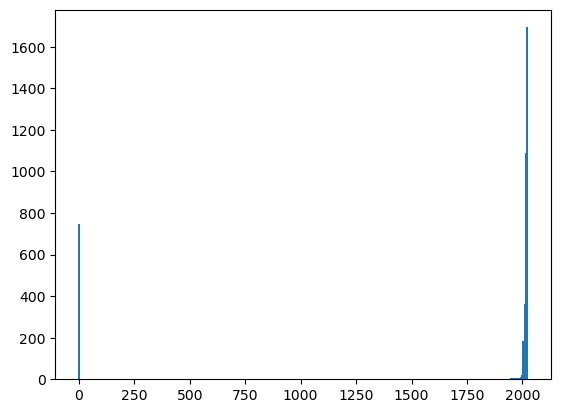

In [91]:
plt.bar(x=begining_year_count["Begin Year"], height=begining_year_count["Count"], width=10)
plt.show()

In [92]:
x=begining_year_count["Begin Year"]
y=begining_year_count["Count"]

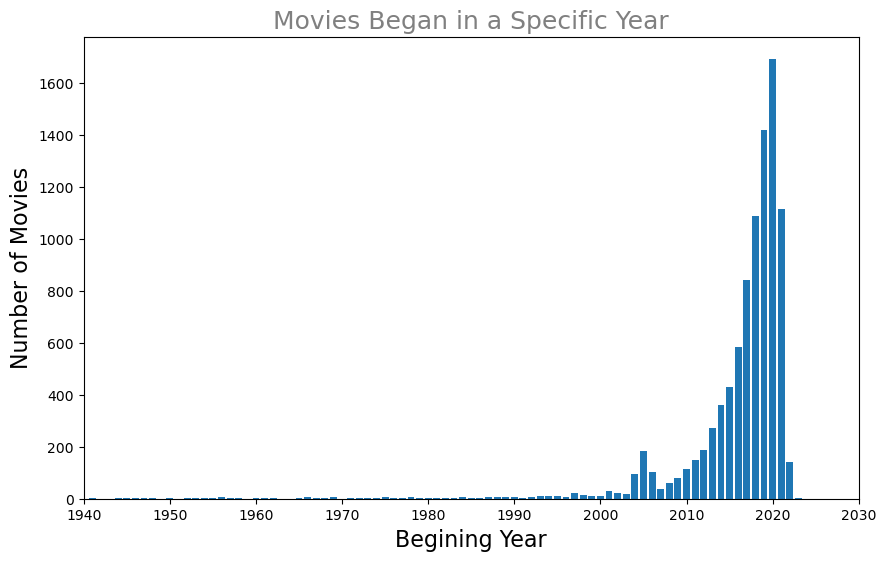

In [93]:
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlim(1940,2030)
plt.title("Movies Began in a Specific Year", fontdict={"fontsize":18, "color":"grey"})
plt.xlabel("Begining Year", loc="center", fontdict={"fontsize":16, "color":"black"})
plt.ylabel("Number of Movies", loc="center", fontdict={"fontsize":16, "color":"black"})
plt.show()

### Scatter plot

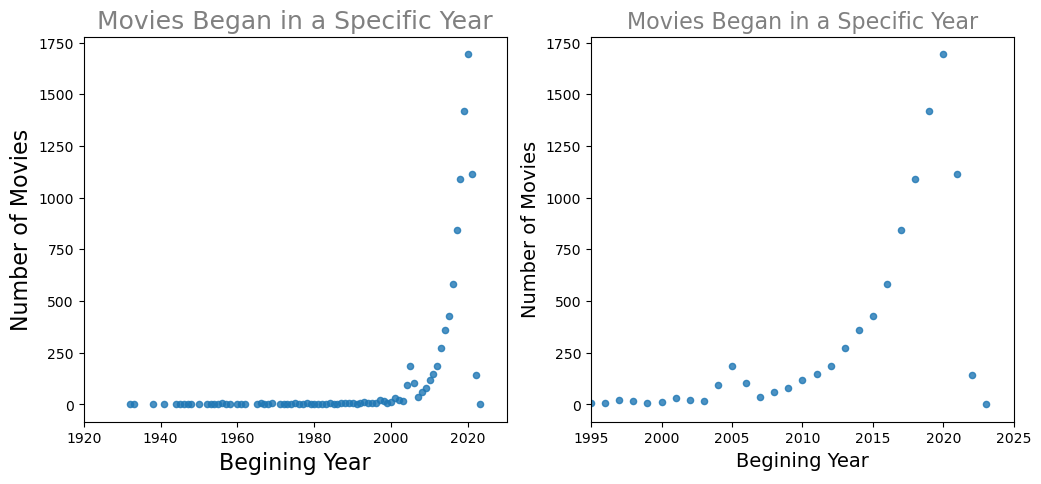

In [94]:
x=pd.DataFrame(begining_year_count, columns=["Begin Year"])
y=pd.DataFrame(begining_year_count, columns=["Count"])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.8, s=20)
plt.xlim(1920, 2030)

plt.title("Movies Began in a Specific Year", fontdict={"fontsize":18, "color":"grey"})
plt.xlabel("Begining Year", loc="center", fontdict={"fontsize":16, "color":"black"})
plt.ylabel("Number of Movies", loc="center", fontdict={"fontsize":16, "color":"black"})

plt.subplot(1,2,2)
plt.scatter(x, y, alpha=0.8, s=20)
plt.xlim(1995, 2025)

plt.title("Movies Began in a Specific Year", fontdict={"fontsize":16, "color":"grey"})
plt.xlabel("Begining Year", loc="center", fontdict={"fontsize":14, "color":"black"})
plt.ylabel("Number of Movies", loc="center", fontdict={"fontsize":14, "color":"black"})

plt.show()